https://github.com/farizrahman4u/seq2seq
    
1. Seq2Seq 란?
    Seq2Seq의 구조
    - Seq2Seq 시퀀스를 받고 다른 쉬퀀스로 변환하는 모델로, 문장 등의 입력을 압축하는 encoder와 출력을 전개하는 decoder로 구성
    - encoder와 decoder에 각각 RNN 층이 구축되어 encoder와 decoder가 연결시킴을써 Seq2Seq가 만들어 진다.
    - "나는 펜을 가지고 있다" 라는 문장을 "I have a pen"라는 영문으로 번역하는 것이 가능하다
    - 챗봇, 언어번역
    - Encoder : 각시간마다 시계열 데이터(문장)으로 입력된다.
        -> RNN(LSTM)입력된 시퀀스를 처리한다. -> RNN의 출력결과
        -> 시퀀스 결과를 가진다.
    - Decoder : 문장이 순서대로 주어지면 대상 시퀸스의 다음 문자를 예측하도록 훈련된다.
        -> RNN의 출력결과를 무시하고 다음 문자를 예측한다.
        

    - 추론 단계 : 입력단어 (시퀀스 : 영문)  -> 백터 변환 -> LSTM층을 이용하서 Encoder가 된다.
    -> 입력 데이터를 내부 상테로 변환 과정을 가진다. (1문장의 대상시퀀스를 Decoder에 입력하고 )-> 다음문장의 변환과정을 가진다. -> 다음문장을 한글로 선택하는 샘플링 작업 -> 샘플링한 단어를 정답 -> Decoder에서 출력된 대상 시퀀스와 내부상태작업을 가진 데이터가 순차적으로 Decoder에게 전달 -> 시퀀스의 종류문자가 생성될때까지 반복하는 구조를 갖는다. 
    
    
2. LSTM 연동
    - Encoder: LSTM 층을 이용해서 영문 시퀀스를 입력하게 되면 2개의 값을 출력하게 된다.
    (input, states->내부 상태값)
    - Decoder: states->내부 상태값을 초기상태로 지정해서 사용하게 된다.
    

Encoder 
    encoder input -> LSTM(encoder_lstm) -> (encoder_output, state_h, state_c) -> state
                    return sequences=Falsee
                    retrun atate = True
    
Decoder
    state(초기) ->LSTM(encoder_lstm) -> (encoder_output, state_h, state_c) ->dense -> decoder-output
                     return sequences=Falsee
                    retrun atate = True
                    
         traslated(예측 모델)

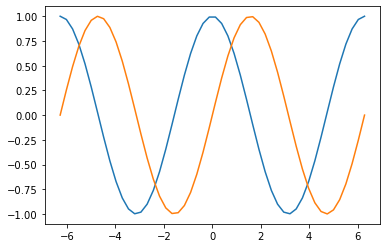

array([ 1.        ,  0.96729486,  0.8713187 ,  0.71834935,  0.51839257,
        0.28452759,  0.03205158, -0.22252093, -0.46253829, -0.67230089,
       -0.8380881 , -0.94905575, -0.99794539, -0.98155916, -0.90096887,
       -0.76144596, -0.57211666, -0.34536505, -0.09602303,  0.1595999 ,
        0.40478334,  0.6234898 ,  0.80141362,  0.92691676,  0.99179001,
        0.99179001,  0.92691676,  0.80141362,  0.6234898 ,  0.40478334,
        0.1595999 , -0.09602303, -0.34536505, -0.57211666, -0.76144596,
       -0.90096887, -0.98155916, -0.99794539, -0.94905575, -0.8380881 ,
       -0.67230089, -0.46253829, -0.22252093,  0.03205158,  0.28452759,
        0.51839257,  0.71834935,  0.8713187 ,  0.96729486,  1.        ])

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#훈련용 데이터 생성
#cos함수 값은 encoder sin함수 값은 decoder
#정답은 decoder함수
x_ax = np.linspace ( -2*np.pi, 2*np.pi) # -2π에서 2π까지의 50개의 값
cos_data =np.cos(x_ax)
sin_data =np.sin(x_ax)


plt.plot(x_ax, cos_data)
plt.plot(x_ax, sin_data)
plt.show()
cos_data

In [4]:
#02. 인코더와 디코더의 모양을 만들자
#시계열 수를 10으로 지정
n_rnn = 10 #시계열수

n_sample = len(x_ax)-n_rnn #샘플

x_encoder = np.zeros((n_sample, n_rnn)) # encoder의 입력
x_decoder = np.zeros((n_sample, n_rnn)) #decoder의 입력
t_decoder = np.zeros((n_sample, n_rnn)) #decoder의 출력

#print(x_encoder.shape)
#print(x_decoder.shape)
#print(t_decoder.shape)

#03 x_encoder에 cos함수 값을 지정하고 x_decoder에 sin 값을 지정한다.
for i in range(0,n_sample):
    x_encoder[i] = cos_data [i:i+n_rnn]
    x_decoder[i, 1:] = sin_data[i:i+n_rnn-1]

#04 t_decoder에 sin 값을 그대로 ㄷ입
for j in range(0,n_sample):
    t_decoder[j] = sin_data[j:j+n_rnn]    

#t_decoder

#05 뉴런 데이터 형으로 변환
x_encoder = x_encoder.reshape(n_sample,n_rnn,1)
x_decoder = x_decoder.reshape(n_sample,n_rnn,1)
t_decoder = t_decoder.reshape(n_sample,n_rnn,1)
#t_decoder

Seq2Seq 구축 (학습 모델 구축, 예측 모델 구축)

1. 학습모델 구축 (모델설정) : Model 해당 클래스만 사용 LSTM

2. 학습모델 구축 (encoder의 구축)

3. 학습모델 구축 (decoder 구축)

4. 학습모델 구축(모델 컴파일)

5. 학습모델 구축( 구축한 학습모델을 학습을 진행한다)

6. 학습모델 구축( 학습 값을 확인한다.


7. 예측모델 구축( encoder 구축)

8. 예측모델 구축( decoder 구축)

9. 번역에 대한 함수를 정의 -> 시퀀스 구축 


In [5]:
# Seq2Seq 구축(학습 모델 구축, 예측모델 구축)
#1. 학습모델 구축(모델설정) : Model 해당 클래스만 사용 LSTM

from keras.models import Model
from keras.layers import Dense, LSTM, Input

n_in =1 #입력 층의 뉴런 수
n_mid = 20 # 중간층 뉴런 수
n_out = n_in #출력 층의 뉴런 수

encoder_input = Input(shape = (n_rnn, n_in)) #시계열 수, 입력층 수
encoder_lstm = LSTM(n_mid, return_state = True) 
#중간층 (return_state =Trun : 해당시간 출력 ht, 상태를 리턴)

#2. 학습 모델 구축(encoder의 구축)
encoder_out, encoder_state_h, encoder_state_c = encoder_lstm(encoder_input)
encoder_state = [encoder_state_h, encoder_state_c]

In [6]:
#3. 학습 모델 구축(decoder의 구축)
decoder_input = Input(shape=(n_rnn,n_in)) #decoder의 입력레이어 
decoder_lstm = LSTM(n_mid, return_sequences = True, return_state =True)

#decoder에서 출력한 상태는 전혀 사용되지 않는다
decoder_output, _, _ = decoder_lstm(decoder_input, initial_state=encoder_state)

decoder_dense = Dense(n_out, activation = 'linear') #결합층
decoder_output = decoder_dense(decoder_output)

In [7]:
#4. 학습모델 구축(모델 컴파일)
model = Model([encoder_input, decoder_input], decoder_output)
model.compile(loss='mean_squared_error', optimizer='sgd')
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 10, 1)]      0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 10, 1)]      0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 20), (None,  1760        input_3[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, 10, 20), (No 1760        input_4[0][0]                    
                                                                 lstm_2[0][1]               

In [8]:
#5. 학습모델 구축( 학습모델 구축한 것을 학습을 실시)
history = model.fit([x_encoder, x_decoder], t_decoder, batch_size=8, epochs=50)

Epoch 1/50
5/5 [==============================] - 2s 6ms/step - loss: 0.4444
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 0.4211
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 0.4064
Epoch 4/50
5/5 [==============================] - 0s 5ms/step - loss: 0.3849
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3622
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3485
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3347
Epoch 8/50
5/5 [==============================] - 0s 5ms/step - loss: 0.3224
Epoch 9/50
5/5 [==============================] - 0s 5ms/step - loss: 0.3117
Epoch 10/50
5/5 [==============================] - 0s 5ms/step - loss: 0.2984
Epoch 11/50
5/5 [==============================] - 0s 5ms/step - loss: 0.2876
Epoch 12/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2788
Epoch 13/50
5/5 [==============================] - 0s 4ms/step - loss: 0.

<function matplotlib.pyplot.show(close=None, block=None)>

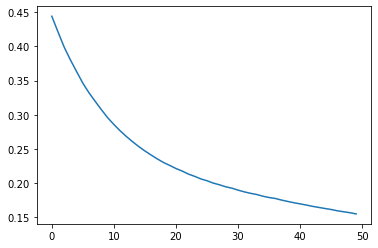

In [10]:
#6. 학습모델 구축( 학습 값을 확인한다.)
loss = history.history['loss']
plt.plot(np.arange(len(loss)),loss)
plt.show

In [11]:
#7. 예측모델 구축(encoder 구축)
# encoder는 수신상태로 리턴하고 decoder는 입력과 상태값을 받아서 출력상태를 리턴
# encoder_input - encoder_lstm - encoder_state
encoder_model = Model(encoder_input, encoder_state)

#8. 예측모델 구축(decoder)
decoder_input = Input(shape=(1,n_in)) 
decoder_state_in_h = Input(shape =(n_mid,))
decoder_state_in_c = Input(shape =(n_mid,))
decoder_state_in = [decoder_state_in_h,decoder_state_in_c]
decoder_output, decoder_state_h, decoder_state_c = decoder_lstm(decoder_input, initial_state = decoder_state_in)

decoder_state = [decoder_state_h, decoder_state_c]
decoder_output = decoder_dense(decoder_output)
#각각 리스트 값을 유지하고 있으면, 입력으로 전달할 때 각 목록을 결합해서 전달한다. 그래서 +를 사용해서 연결한다.
decoder_model = Model([decoder_input] + decoder_state_in,  [decoder_output]+ decoder_state)


In [12]:
#9. 번역에 대한 함수를 정의 : 코사인 함수를 번역해서 사인함수 변환 함수
#encoder 입력값을 예측 모델에 적용하는 함수

def translate(input_data):
    translated = []
    #LSTM 예측, 출력은 내부상태, h,c 2가지가 리턴
    state_value = encoder_model.predict(input_data)
    y_decoder = np.zeros((1,1,1))
    
    for i in range(0, n_rnn):
        #시간상태h, 목록c -> decoder_model학습된 LSTM과 Dence에 대한 예측율
        y,h,c = decoder_model.predict([y_decoder] + state_value)
        y = y[0][0][0] #출력값 y 번역된 값을 출력
        translated.append(y)
        y_decoder[0][0][0] = y #다음 시간에 전달할 값
        state_value =[h,c] # 다음시간에 전달할 상태
    return translated

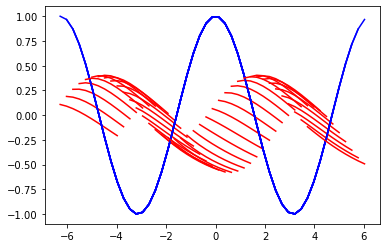

In [13]:
#시각화
idices = range(0,40)
for indice in idices:
    x = x_encoder[indice : indice+1]
    y = translate(x)
    
    plt.plot(x_ax[indice:indice+n_rnn], x.reshape(-1), color='b')
    plt.plot(x_ax[indice:indice+n_rnn], y, color='r')
    
plt.show()


In [16]:
import pandas as pd
import urllib3
import zipfile
import shutil
import os
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
http = urllib3.PoolManager()
url ='http://www.manythings.org/anki/kor-eng.zip'
filename = 'kor-eng.zip'
path = os.getcwd()
zipfilename = os.path.join(path, filename)
with http.request('GET', url, preload_content=False) as r, open(zipfilename, 'wb') as out_file:       
    shutil.copyfileobj(r, out_file)
with zipfile.ZipFile(zipfilename, 'r') as zip_ref:
    zip_ref.extractall(path)
    
#%%    
lines= pd.read_csv('kor.txt', names=['src', 'tar', 'cc'], sep='\t')
print( len(lines) )
#%%
lines = lines.loc[:, 'src':'tar']
lines = lines[0:60000] # 6만개만 저장
print( lines.sample(10) )
#%%
lines.tar = lines.tar.apply(lambda x : '\t '+ x + ' \n')
print(lines.sample(10))
#%%
# 글자 집합 구축
src_vocab=set()
for line in lines.src: # 1줄씩 읽음
    for char in line: # 1개의 글자씩 읽음
        src_vocab.add(char)
tar_vocab=set()
for line in lines.tar:
    for char in line:
        tar_vocab.add(char)
        
print(src_vocab)   
#%%
src_vocab_size = len(src_vocab)+1
tar_vocab_size = len(tar_vocab)+1
print(src_vocab_size)
print(tar_vocab_size)     
#%%
src_vocab = sorted(list(src_vocab))
tar_vocab = sorted(list(tar_vocab))
print(src_vocab[45:75])
print(tar_vocab[45:75])
#%%
src_to_index = dict([(word, i+1) for i, word in enumerate(src_vocab)])
tar_to_index = dict([(word, i+1) for i, word in enumerate(tar_vocab)])
print(src_to_index)
print(tar_to_index)
#%%
encoder_input = []
for line in lines.src: #입력 데이터에서 1줄씩 문장을 읽음
    temp_X = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      temp_X.append(src_to_index[w]) # 글자를 해당되는 정수로 변환
    encoder_input.append(temp_X)
    
print(encoder_input[:5])
#%%
decoder_input = []
for line in lines.tar:
    temp_X = []
    for w in line:
      temp_X.append(tar_to_index[w])
    decoder_input.append(temp_X)
print(decoder_input[:5])
#%%
decoder_target = []
for line in lines.tar:
    t=0
    temp_X = []
    for w in line:
      if t>0:
        temp_X.append(tar_to_index[w])
      t=t+1
    decoder_target.append(temp_X)
print(decoder_target[:5])
#%%
max_src_len = max([len(line) for line in lines.src])
max_tar_len = max([len(line) for line in lines.tar])
print(max_src_len)
print(max_tar_len)
#%%
encoder_input = pad_sequences(encoder_input, maxlen=max_src_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen=max_tar_len, padding='post')
decoder_target = pad_sequences(decoder_target, maxlen=max_tar_len, padding='post')
print(encoder_input)
#%%
encoder_input = to_categorical(encoder_input)
decoder_input = to_categorical(decoder_input)
decoder_target = to_categorical(decoder_target)
#%%
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model
import numpy as np
#%%
encoder_inputs = Input(shape=(None, src_vocab_size))
encoder_lstm = LSTM(units=256, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
# encoder_outputs도 같이 리턴받기는 했지만 여기서는 필요없으므로 이 값은 버림.
encoder_states = [state_h, state_c]
# LSTM은 바닐라 RNN과는 달리 상태가 두 개. 바로 은닉 상태와 셀 상태.
#%%
decoder_inputs = Input(shape=(None, tar_vocab_size))
decoder_lstm = LSTM(units=256, return_sequences=True, return_state=True)
decoder_outputs, _, _= decoder_lstm(decoder_inputs, initial_state=encoder_states)
# 디코더의 첫 상태를 인코더의 은닉 상태, 셀 상태로 합니다.
decoder_softmax_layer = Dense(tar_vocab_size, activation='softmax')
decoder_outputs = decoder_softmax_layer(decoder_outputs)
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy")
#%%
model.fit(x=[encoder_input, decoder_input], y=decoder_target, batch_size=64, epochs=50, validation_split=0.2)
encoder_model = Model(inputs=encoder_inputs, outputs=encoder_states)
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(256,))
decoder_state_input_c = Input(shape=(256,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
decoder_states = [state_h, state_c]
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs = decoder_softmax_layer(decoder_outputs)
decoder_model = Model(inputs=[decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs] + decoder_states)
index_to_src = dict((i, char) for char, i in src_to_index.items())
index_to_tar = dict((i, char) for char, i in tar_to_index.items())
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)
    # <SOS>에 해당하는 원-핫 벡터 생성
    target_seq = np.zeros((1, 1, tar_vocab_size))
    target_seq[0, 0, tar_to_index['\t']] = 1.
    stop_condition = False
    decoded_sentence = ""
    # stop_condition이 True가 될 때까지 루프 반복
    while not stop_condition:
        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        # 예측 결과를 문자로 변환
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = index_to_tar[sampled_token_index]
        # 현재 시점의 예측 문자를 예측 문장에 추가
        decoded_sentence += sampled_char
        # <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_tar_len):
            stop_condition = True
        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        target_seq = np.zeros((1, 1, tar_vocab_size))
        target_seq[0, 0, sampled_token_index] = 1.
        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]
    return decoded_sentence
for seq_index in [3,50,100,300,1001]: # 입력 문장의 인덱스
    input_seq = encoder_input[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print(35 * "-")
    print('입력 문장:', lines.src[seq_index])
    print('정답 문장:', lines.tar[seq_index][1:len(lines.tar[seq_index])-1]) # '\t'와 '\n'을 빼고 출력
    print('번역기가 번역한 문장:', decoded_sentence[:len(decoded_sentence)-1]) # '\n'을 빼고 출력


3648
                                                  src                      tar
673                                  Someone coughed.                누군가 기침했어.
1010                             I made reservations.                  예약해 놨어.
436                                     Keep talking.                   계속 말해.
3315     I didn't know that you used to teach French.    나는 네가 프랑스어를 가르쳤는지 몰랐어
974                              Can I have this cup?              이 컵 가져도 돼요?
2950           How do you say "I love you" in French?       사랑해를 프랑스어로 어떻게 말해?
968                               Where's Tom hiding?            톰은 어디에 숨어 있어?
263                                       Start over.                    다시 해.
76                                          How cute!                이렇게 귀엽다니!
3436  The human mind is good at recognizing patterns.  인간의 마음은 패턴을 인식하는 것을 잘해.
                                          src                             tar
1771               Actinium melts at 1,051°C.   

HOG - Histogram of Oriented Gradients
: 영상의 지역적 그래디언트 방향 정보를 히스토그램으로 표현해서 영상의 형태를 표현하는 방법
foundLocations(검출된 사각형 영역 정보), foundWeights(검출된 사각형영역가중치) =cv2.HOGDescriptor.detectMultiScale( img, 입력 영상 hitThreshold=None, 특징 벡터와 SVM 분류 평면까지의 거리에 대한 임계값 winStride=None, 셀 윈도우 이동 크기 padding=None, 패딩 크기 scale=None, 검색 윈도우 크기 확대 비율 finalThreshold=None, 검출 결정을 위한 임계값 useMeanshiftGrouping=None 겹쳐진 검색 윈도우를 합치는 플래그 ) -> foundLocations, foundWeights
hog = cv2.HOGDescriptor() 
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) 
hogParams = {'hitThreshold' : 0.0,'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05,'finalThreshold':2,'useMeanshiftGrouping':False}

In [1]:
import numpy  as np
import cv2


cap = cv2.VideoCapture('C:\\myImg\\People.mp4')
#프레임의 가로 세로 값 프레임값 리턴 받기
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc  = cv2.VideoWriter_fourcc('m','p','4','v'    )
writer   =  cv2. VideoWriter('C:\\myImg\\People_res.mp4',fourcc,fps,(width, height) )
hog = cv2.HOGDescriptor( (48,96),(16,16),(8,8),(8,8),9) #대상을 인식하는 객체
hog.setSVMDetector(cv2.HOGDescriptor_getDaimlerPeopleDetector())
hogParams = {'hitThreshold' : 0.0,'winStride': (8, 8), 'padding': (32, 32),\
             'scale': 1.05,'finalThreshold':2,'useMeanshiftGrouping':True}
while(1):
        ret , frame  = cap.read()
        if frame is None:
             break
        h,r= hog.detectMultiScale(frame,**hogParams)
        for (x,y,w,h)  in h:
             cv2.rectangle(frame, (x,y),(x+w, y+h), ( 0,50,255) ,3)
        cv2.imshow('frame', frame)
        writer.write(frame)
        key  = cv2.waitKey(30)  & 0xff
        if  key == 27 :
             break
cap.release()
writer.release()
cv2.destroyAllWindows()

In [10]:
#이미지에서 사람 추출하기

import numpy  as np
import cv2

img  = cv2.imread("C:\\myImg\\pp.jpg")
#프레임의 가로 세로 값 프레임값 리턴 받기


hog = cv2.HOGDescriptor() #대상을 인식하는 객체
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (5, 5), 'padding': (32, 32), 'scale': 1.05,}

h,r =hog.detectMultiScale(img,**hogParams)


for (x,y,w,h)  in h:
    cv2.rectangle(img, (x,y),(x+w, y+h), ( 0,50,255) ,3)

cv2.imwrite( "C:\\myImg\\pp_res.jpg",img)


if len(faces) >=2:


True

1. https://github.com/opencv/opencv/tree/master/data/haarcascades 를 다운로드 받아 안경쓴 사람들을 찾아서 잘라서 저장하세요

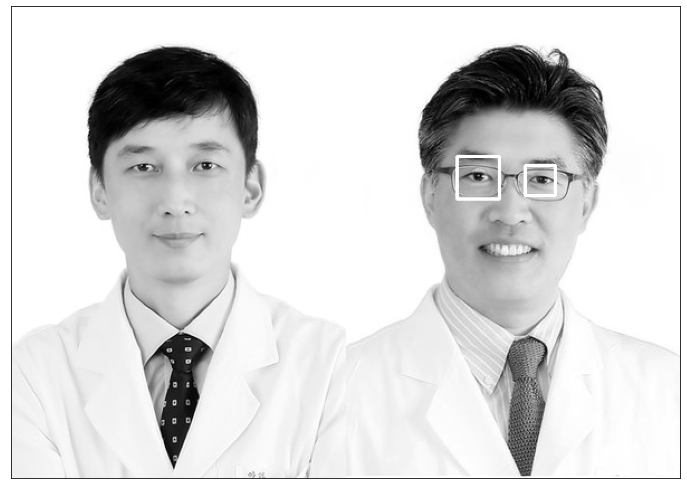

In [8]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('C:\\myImg\\gg.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

glasses = cv2.CascadeClassifier('C:\\Users\\user\\Desktop\\opencv-master\\data\\haarcascades\\haarcascade_eye.xml')

faces = glasses.detectMultiScale(gray, 1.1, 10)

sort_fc= sorted(faces, key = lambda x: x[2] * x[3], reverse=False)

sort_fc = sort_fc[:2]

for x,y,w,h in sort_fc:
    cv2.rectangle(gray, (x,y), (x+w, y+h), (255,0,0), 2)
'''    
#(x,y,w,h)=faces
for (x,y,w,h) in faces:
    cv2.rectangle(gray, (x,y), (x+w,y+h), (255,0,0),2)
'''
plt.figure(figsize=(12,12))
plt.imshow(gray, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
